In [1]:
!!pip install yfinance scikit-learn matplotlib pandas

['Requirement already satisfied: yfinance in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (0.2.65)',
 'Requirement already satisfied: scikit-learn in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (1.3.0)',
 'Requirement already satisfied: matplotlib in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (3.7.2)',
 'Requirement already satisfied: pandas in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (2.2.3)',
 'Requirement already satisfied: numpy>=1.16.5 in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (from yfinance) (1.26.4)',
 'Requirement already satisfied: requests>=2.31 in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (from yfinance) (2.31.0)',
 'Requirement already satisfied: multitasking>=0.0.7 in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (from yfinance) (0.0.12)',
 'Requirement already satisfied: platformdirs>=2.0.0 in c:\\users\\hamza computer\\anaconda3\\lib\\site-packages (from yfinance) (3.10.0)'

STEP 1: IMPORT LIBRARIES


In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

STEP 2: LOAD THE HISTORICAL DATA (e.g TESLA)

In [10]:
stock = yf.Ticker("TSLA")
data = stock.history(period="5mo")  # last 5 months
data = data[["Open", "High", "Low", "Close", "Volume"]]
data.dropna(inplace=True)

STEP 3: CREATE FEATURES AND TARGET

In [11]:
X = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]

STEP 4: TRAIN-TEST/SPLIT

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

STEP 5: MODEL TRAINING

A. TRAIN LINEAR REGRESSION MODEL

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

B. TRAIN RANDOM FOREST MODEL

In [21]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

STEP 6: PLOTTING

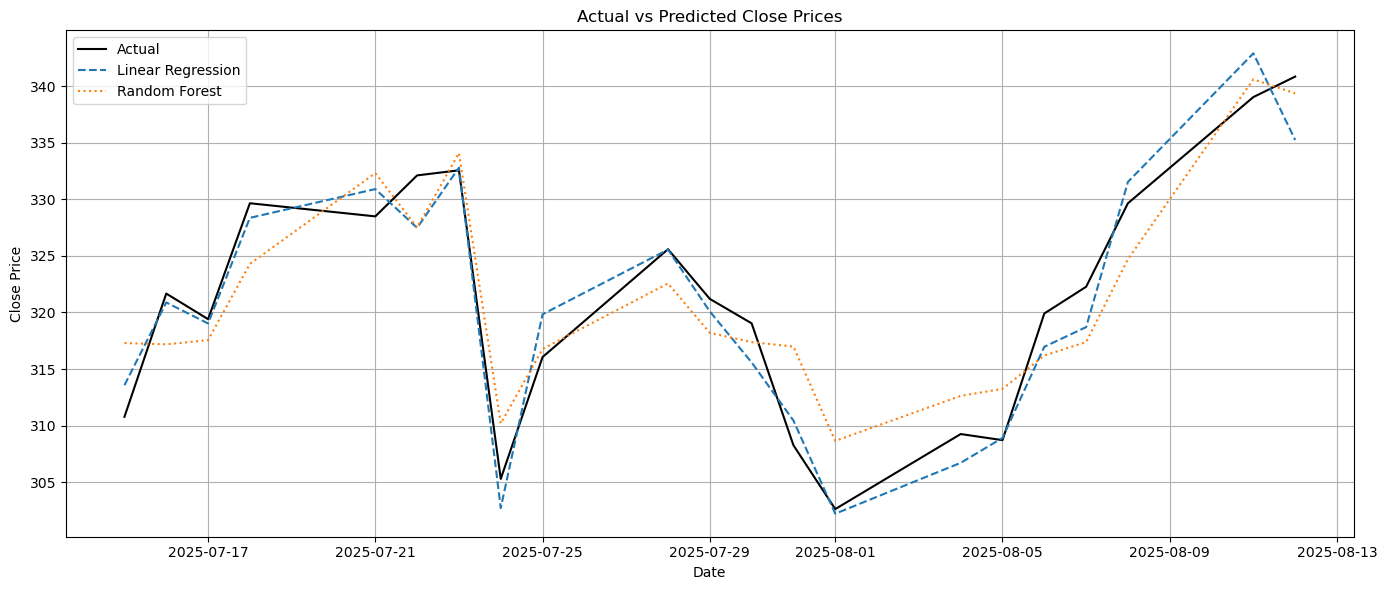

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label="Actual", color='black')
plt.plot(y_test.index, lr_pred, label="Linear Regression", linestyle='--')
plt.plot(y_test.index, rf_pred, label="Random Forest", linestyle=':')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()